In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats



data_path = "commodities_12_22.csv"
# Read the CSV file into a pandas dataframe
df = pd.read_csv(data_path)

# This is for EDA

In [247]:
# Print the first few rows of the dataframe (optional)
dtypes = df.dtypes
print(f'''{df.head()}

Data Types of each column: \n{dtypes}''')


        Date  Crude Oil  Brent Oil  Natural Gas    Gold  Silver  Copper
0 2022-06-15     119.11     121.35        7.296  1814.8  21.090  4.1777
1 2022-06-14     118.93     121.17        7.189  1813.5  20.954  4.1565
2 2022-06-13     120.93     122.27        8.609  1831.8  21.255  4.2115
3 2022-06-10     120.67     122.01        8.850  1875.5  21.931  4.2945
4 2022-06-09     121.51     123.07        8.963  1852.8  21.817  4.3810

Data Types of each column: 
Date           datetime64[ns]
Crude Oil             float64
Brent Oil             float64
Natural Gas           float64
Gold                  float64
Silver                float64
Copper                float64
dtype: object


In [248]:
print(df)

           Date  Crude Oil  Brent Oil  Natural Gas    Gold  Silver  Copper
0    2022-06-15     119.11     121.35        7.296  1814.8  21.090  4.1777
1    2022-06-14     118.93     121.17        7.189  1813.5  20.954  4.1565
2    2022-06-13     120.93     122.27        8.609  1831.8  21.255  4.2115
3    2022-06-10     120.67     122.01        8.850  1875.5  21.931  4.2945
4    2022-06-09     121.51     123.07        8.963  1852.8  21.817  4.3810
...         ...        ...        ...          ...     ...     ...     ...
3254 2012-01-29        NaN        NaN          NaN     NaN  33.908     NaN
3255 2012-01-22        NaN        NaN          NaN     NaN  31.793     NaN
3256 2012-01-15        NaN        NaN          NaN     NaN  29.785     NaN
3257 2012-01-08        NaN        NaN          NaN     NaN  28.848     NaN
3258 2012-01-02        NaN        NaN          NaN     NaN  28.160     NaN

[3259 rows x 7 columns]


In [249]:
#Total Rows
totalRows = df.shape[0]

#Counting the # of Nulls
nulls = df.isnull().sum(axis=1)
rowCountWNulls = len(nulls[nulls>0])

#Latest null row
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#Find the first row with a Null value (Excluding 'Date')

nullMask = df.iloc[:, 1:].isnull().any(axis = 1) #Check for nulls except for Date
latestNullRow = df[nullMask].iloc[0]

print(f'''Total rows: {totalRows}
Number of rows with nulls: {rowCountWNulls}
Null Date: {latestNullRow.iloc[0]}''')

Total rows: 3259
Number of rows with nulls: 603
Null Date: 2022-05-29 00:00:00


In [251]:
commoditiesDf = df.dropna(axis=0)
totalRows = commoditiesDf.shape[0]
#Counting the # of Nulls
nulls = commoditiesDf.isnull().sum(axis=1)
rowCountWNulls = len(nulls[nulls>0])
duplicates = commoditiesDf.duplicated()

# Dtype
dtypes = commoditiesDf.dtypes

print(f'''{commoditiesDf.head()}      
Total rows: {totalRows}
Number of rows with nulls: {rowCountWNulls}
Latest Date: {commoditiesDf['Date'].min()}
Total amount of duplicates: {duplicates.sum()}
Data Types of dropNA: \n{dtypes}''')

        Date  Crude Oil  Brent Oil  Natural Gas    Gold  Silver  Copper
0 2022-06-15     119.11     121.35        7.296  1814.8  21.090  4.1777
1 2022-06-14     118.93     121.17        7.189  1813.5  20.954  4.1565
2 2022-06-13     120.93     122.27        8.609  1831.8  21.255  4.2115
3 2022-06-10     120.67     122.01        8.850  1875.5  21.931  4.2945
4 2022-06-09     121.51     123.07        8.963  1852.8  21.817  4.3810      
Total rows: 2656
Number of rows with nulls: 0
Latest Date: 2012-01-03 00:00:00
Total amount of duplicates: 0
Data Types of dropNA: 
Date           datetime64[ns]
Crude Oil             float64
Brent Oil             float64
Natural Gas           float64
Gold                  float64
Silver                float64
Copper                float64
dtype: object


# Starting to clean explore plotting the code

In [250]:


#Set the date as the index
#dropNA.set_index('Date', inplace = True)


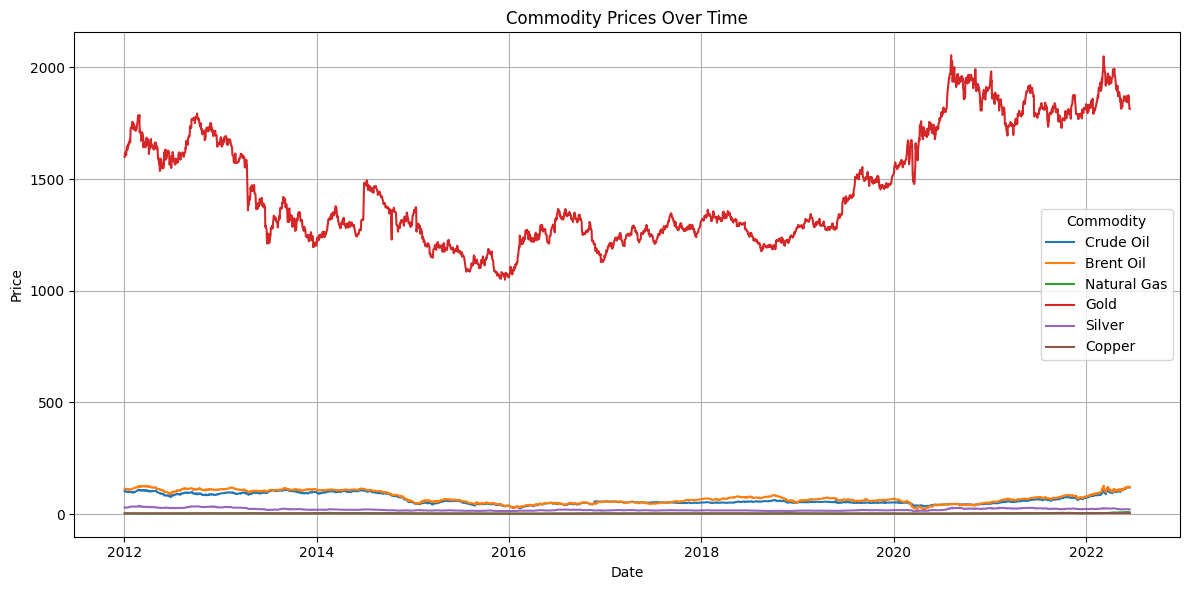

In [254]:
#Create the line plot
plt.figure(figsize=(12,6))

# Extract the 'Date' column
dates = commoditiesDf['Date']

# Get all other columns (excluding the first one)
other_columns = commoditiesDf.columns[1:]  # Assuming 'Date' is the first column

# Loop through each column and plot it against the 'Date' column
for col in other_columns:
    plt.plot(dates, commoditiesDf[col], label=col)


plt.title("Commodity Prices Over Time")
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(title = 'Commodity')
plt.grid(True)

plt.tight_layout()
plt.show()

In [255]:
#Gold Table
goldDf = commoditiesDf[['Date','Gold']]
print(goldDf)

           Date    Gold
0    2022-06-15  1814.8
1    2022-06-14  1813.5
2    2022-06-13  1831.8
3    2022-06-10  1875.5
4    2022-06-09  1852.8
...         ...     ...
2729 2012-01-09  1607.5
2730 2012-01-06  1616.1
2731 2012-01-05  1619.4
2732 2012-01-04  1611.9
2733 2012-01-03  1599.7

[2656 rows x 2 columns]


In [256]:
noGoldDf = commoditiesDf.drop("Gold", axis = 1)
print(noGoldDf)

           Date  Crude Oil  Brent Oil  Natural Gas  Silver  Copper
0    2022-06-15     119.11     121.35        7.296  21.090  4.1777
1    2022-06-14     118.93     121.17        7.189  20.954  4.1565
2    2022-06-13     120.93     122.27        8.609  21.255  4.2115
3    2022-06-10     120.67     122.01        8.850  21.931  4.2945
4    2022-06-09     121.51     123.07        8.963  21.817  4.3810
...         ...        ...        ...          ...     ...     ...
2729 2012-01-09     101.31     112.45        3.011  28.749  3.4130
2730 2012-01-06     101.56     113.06        3.062  28.653  3.4310
2731 2012-01-05     101.81     112.74        2.980  29.265  3.4220
2732 2012-01-04     103.22     113.70        3.096  29.063  3.4290
2733 2012-01-03     102.96     112.13        2.993  29.533  3.5250

[2656 rows x 6 columns]


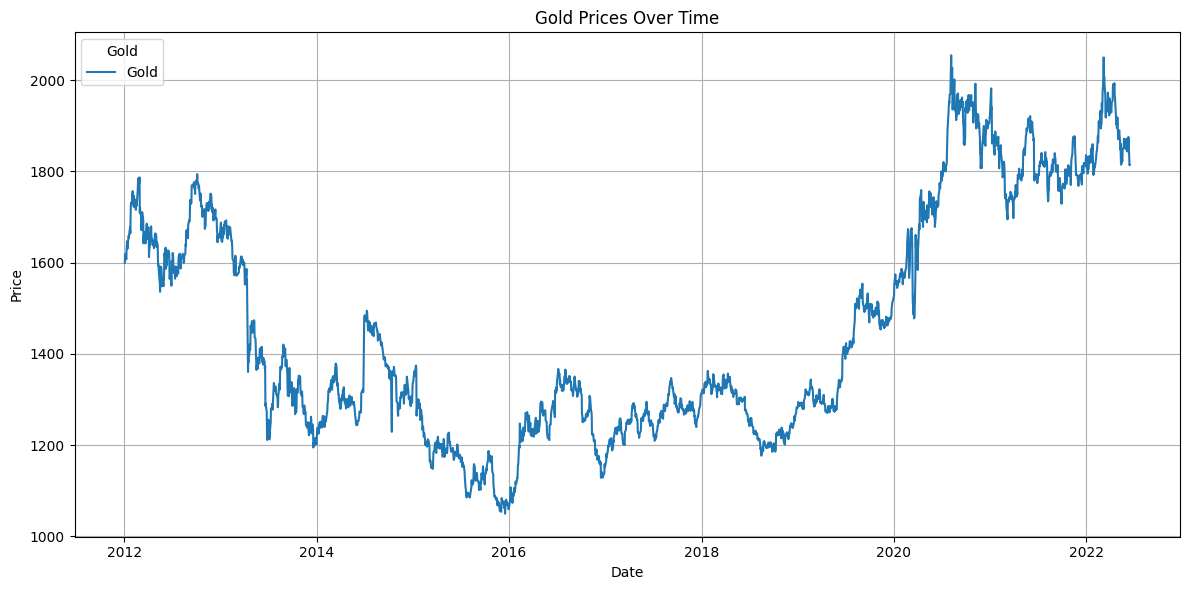

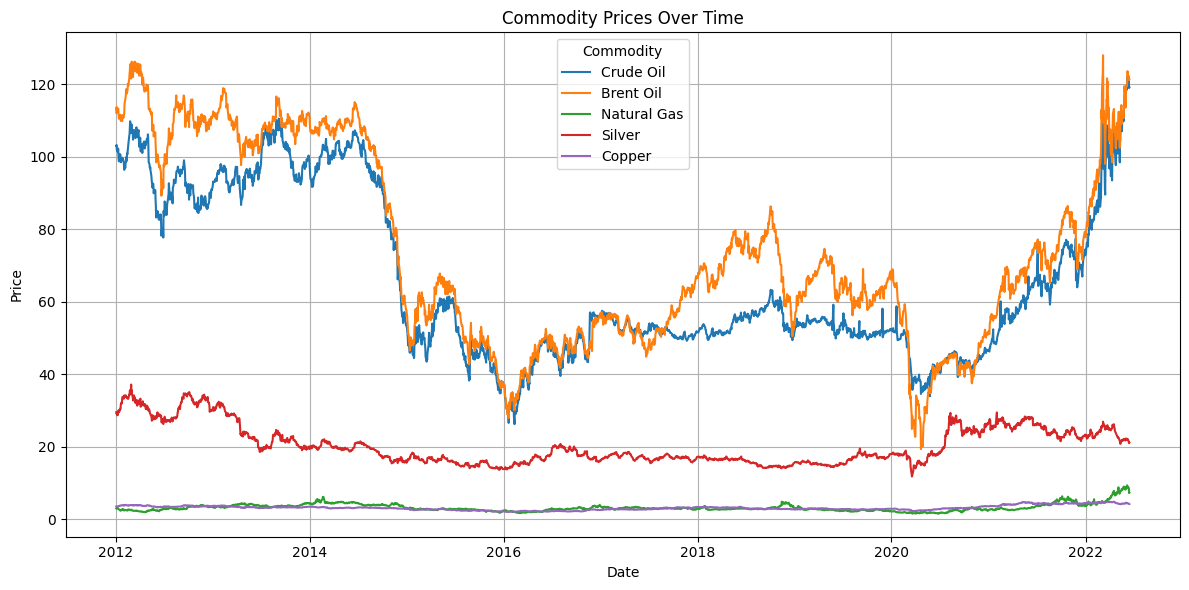

In [260]:

# Gold Line chart


plt.figure(figsize=(12,6))

plt.plot(goldDf['Date'], goldDf['Gold'], label = 'Gold')
plt.title("Gold Prices Over Time")
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(title = 'Gold')
plt.grid(True)
plt.tight_layout()
plt.show()



dates = noGoldDf['Date']
other_columns = noGoldDf.columns[1:]

plt.figure(figsize=(12,6))
for col in other_columns:
    plt.plot(dates, noGoldDf[col], label = col)
plt.title("Commodity Prices Over Time")
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(title = 'Commodity')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

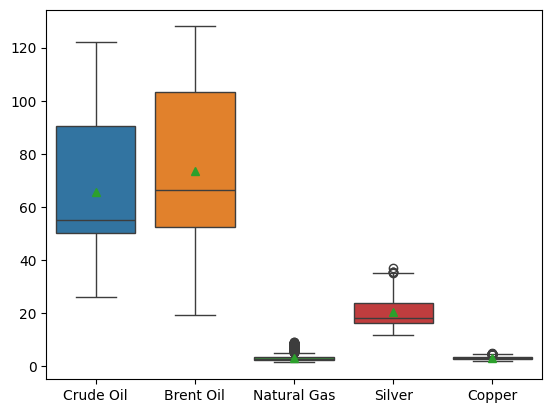

In [261]:
#boxplot for all the commodities

sns.boxplot(
    data = noGoldDf[1:],
    orient = 'v',
    showmeans = True
)

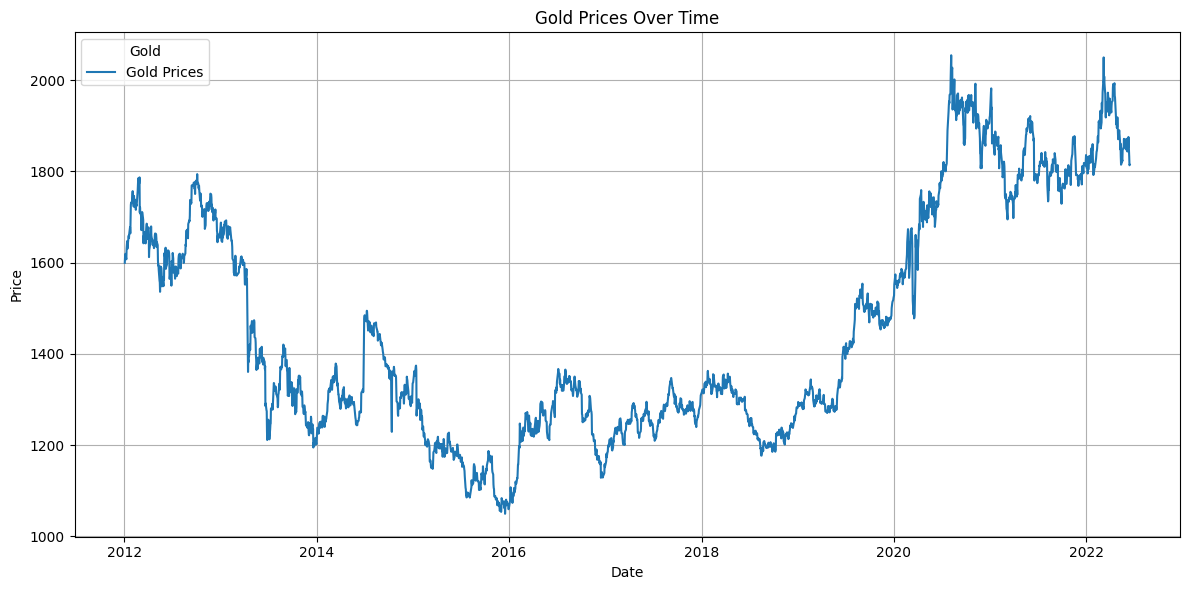

In [263]:
dates = goldDf['Date'].values
gold_prices = goldDf['Gold'].values

plt.figure(figsize=(12,6))

# Plot the scatter points for gold prices
plt.plot(dates, gold_prices, label='Gold Prices')
plt.title("Gold Prices Over Time")
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(title = 'Gold')
plt.grid(True)

plt.tight_layout()
plt.show()